### Setup

In [ ]:
!pip install dicom2nifti

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 67.7 MB/s eta 0:00:00


In [ ]:
import os

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import dicom2nifti

import shutil
import tempfile

### Data

The used data is an MRI DICOM data set of the head of a normal male human aged 52 [link](https://zenodo.org/records/16956#.YFMM5PtKiV5)

### Conversion


The function `dcm2nii` will  convert DICOM (Digital Imaging and Communications in Medicine) files from an MRI (Magnetic Resonance Imaging) directory to NIfTI (Neuroimaging Informatics Technology Initiative) format and save the resulting file in a specified output path.

In [ ]:
def dcm2nii(MRI_dcm_path, nii_out_path):

    '''
    - MRI_dcm_path: Path to the directory containing MRI DICOM files
    - nii_out_path: Path to the directory where the resulting NIfTI file will be saved.
    - tempfile.TemporaryDirectory() to create a temporary directory (tmp) that will be automatically
      deleted when the block of code inside it finishes execution
    - dicom2nifti.convert_directory: convert the DICOM file to NIfTI format.
    '''

    with tempfile.TemporaryDirectory() as tmp:
        tmp = Path(str(tmp))

        # convert dicom directory to nifti
        dicom2nifti.convert_directory(MRI_dcm_path, str(tmp),
                                      compression=True, reorient=True)

        #looks for the first NIfTI file (*nii.gz) in temp
        nii = next(tmp.glob('*nii.gz'))

        # copy nifti file to the specified output path and named it 'MRI.nii.gz'
        shutil.copy(nii, nii_out_path+'MRI.nii.gz')


In [ ]:
nii_out_path = './nii_files/'
path_to_data =  './DICOM/ST000000/SE000001'


dcm2nii(path_to_data, nii_out_path)

### Read the converted nifti file

In [35]:
import nibabel as nib

In [ ]:
path = "./MRI.nii.gz"
MRI_nii = nib.load(path)

In [ ]:
MRI_nii.shape

(256, 256, 27)

The shape `(256, 256, 27)` refers respectively to the Height, Width and the number slices.

In [36]:
#Get the pixel data
mri = MRI_nii.get_fdata()

In [42]:
#Visualize some slices (starting from the 5th one)
def plot(no_):
  plt.figure(figsize=(15,10))

  for i in range(1,no_+1):
    plt.subplot(1,no_,i)
    plt.imshow(mri[:,:,5+i])
    plt.axis("off")

  plt.show

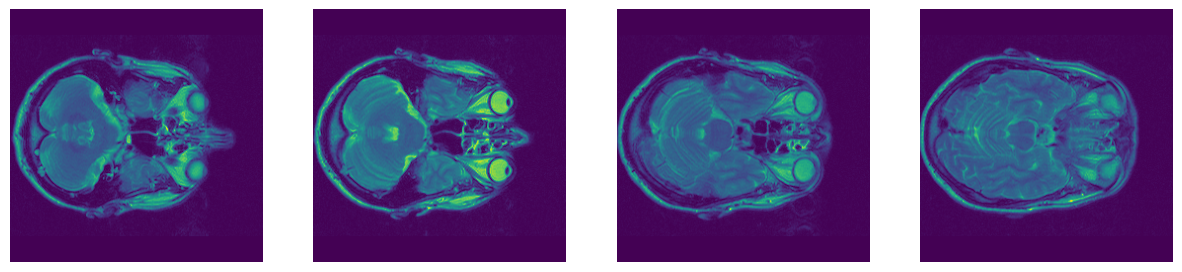

In [43]:
plot(4)

### Try some basis pre-processing step like Z-score normilation of each slice

In [ ]:
scaled_mri =( mri-mri.mean())/mri.std()

In [ ]:
print(scaled_mri.mean())
print(scaled_mri.std())

4.882925339786568e-17
1.0
